# Unveiling the Android App Market: Analyzing Google Play Store Data

<b>Description : </b>Clean, categorize, and visualize Google Play Store data to understand app market dynamics.
Gain in-depth insights into the Android app market by leveraging data analytics, visualization,
and enhanced interpretation skills.


<b> Key Challenges : </b></br>
1.) Data Preparation: Clean and correct data types for accuracy.</br>
2.) Category Exploration: Investigate app distribution across categories.</br>
3.) Metrics Analysis: Examine app ratings, size, popularity, and pricing trends.</br>
4.) Sentiment Analysis: Assess user sentiments through reviews.</br>
5.) Interactive Visualization: Utilize code for compelling visualizations.</br>
6.) Skill Enhancement: Integrate insights from the "Understanding Data Visualization" course.</br>

### Import Libraries :

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

### Read the Dataset :

In [35]:
apps_df = pd.read_csv('Apps.csv')
apps_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
apps_df.shape

(9659, 14)

### Data PreProcessing :

In [37]:
## Check Null Values :

def fetch_null_count_percent(apps_df):
    Null_Count = apps_df.isnull().sum()
    Null_Count = Null_Count[Null_Count > 0]
    nullv_res = pd.DataFrame({'Feature' : Null_Count.index,'Null_Count':Null_Count.values,'Null_Percent':(Null_Count.values/apps_df.shape[0])*100})
    nullv_res = nullv_res.sort_values("Null_Percent", ascending=False)
    return nullv_res

nv_df = fetch_null_count_percent(apps_df)
nv_df

,Feature,Null_Count,Null_Percent
0,Rating,1463,15.146495
1,Size,1227,12.703178
2,Current Ver,8,0.082824
3,Android Ver,2,0.020706


In [38]:
## Handle Null Values :

apps_df['Rating'].fillna(apps_df['Rating'].mean(),inplace=True)
apps_df['Size'].fillna(apps_df['Size'].mean(),inplace=True)
apps_df['Current Ver'].fillna(apps_df['Current Ver'].mode()[0],inplace=True)
apps_df['Android Ver'].fillna(apps_df['Android Ver'].mode()[0],inplace=True)

In [39]:
nv_df = fetch_null_count_percent(apps_df)
nv_df

,Feature,Null_Count,Null_Percent


In [40]:
# Check duplicates :
apps_df.duplicated().sum()

0

In [41]:
## Rename Columns Unnamed: 0
apps_df = apps_df.rename(columns={'Unnamed: 0' : 'Id'})

## Checking DataTypes :
apps_df.dtypes

Id                  int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [42]:
## Ensure "INSTALLS" is a string before using .str accessor , then remove '+' and ',' from INSTALLS and then convert it into integers :
apps_df['Installs'] = apps_df['Installs'].astype(str)
apps_df['Installs'] = apps_df['Installs'].str.replace('+','')
apps_df['Installs'] = apps_df['Installs'].str.replace(',','').astype(int)


## Replacing Current Version value "Varies with Device" by the term 'Unknown' :
apps_df['Current Ver'] = apps_df['Current Ver'].str.replace('Varies with device', 'Unknown')


## Updating Data Type of "Last Updated" column :
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])


## Removing $ sign from Price column :
apps_df['Price'] = apps_df['Price'].str.replace('$','').astype('float64')

In [43]:
apps_df.head()

,Id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Unknown,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## Category Analysis :

#### Analyze the Distribution of Apps by Category :

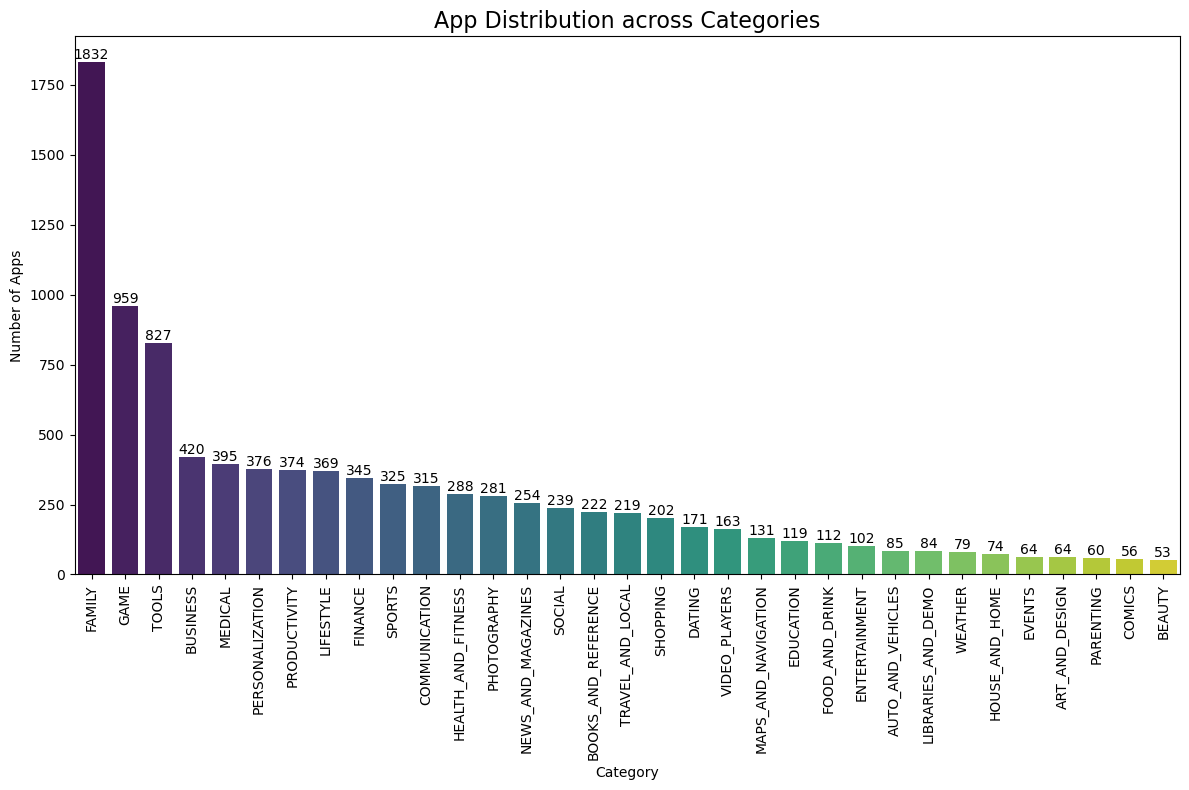

In [44]:
# Count the number of apps in each category :
category_count = apps_df['Category'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=category_count.index, y=category_count.values, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title('App Distribution across Categories', fontsize=16)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Number of Apps', fontsize=10)
plt.tight_layout()
plt.show()

####  Percentage of Apps per Category :

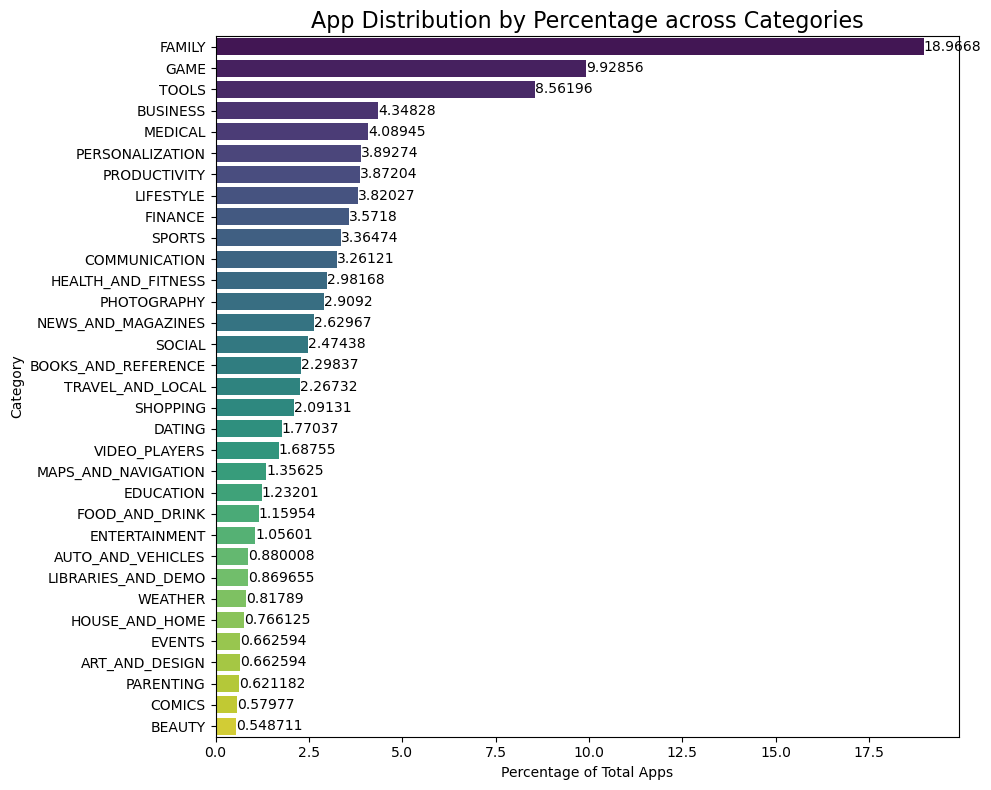

In [45]:
category_percentage = category_count / category_count.sum() * 100


plt.figure(figsize=(10, 8))
px = sns.barplot(x=category_percentage.values, y=category_percentage.index, palette='viridis')
for container in px.containers:
    px.bar_label(container)
plt.title('App Distribution by Percentage across Categories', fontsize=16)
plt.xlabel('Percentage of Total Apps', fontsize=10)
plt.ylabel('Category', fontsize=10)
plt.tight_layout()
plt.show()

### Category wise Ratings :

In [46]:
top_ratings = apps_df.groupby('Category')['Rating'].mean().round(2).sort_values(ascending=False).head(10)

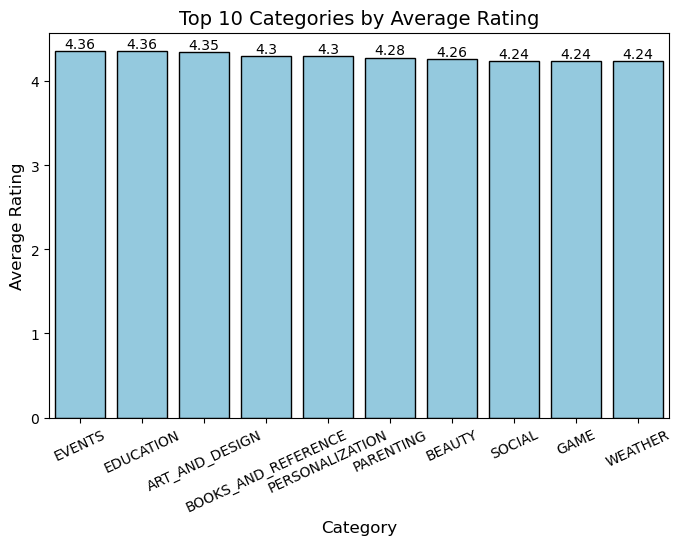

In [47]:
plt.figure(figsize=(8,5))
tx = sns.barplot(x=top_ratings.index, y=top_ratings.values, color='skyblue', edgecolor='black')
for container in tx.containers:
    tx.bar_label(container)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Top 10 Categories by Average Rating', fontsize=14)
plt.xticks(rotation=25, fontsize=10)
plt.show()

### Top Selling Categories :

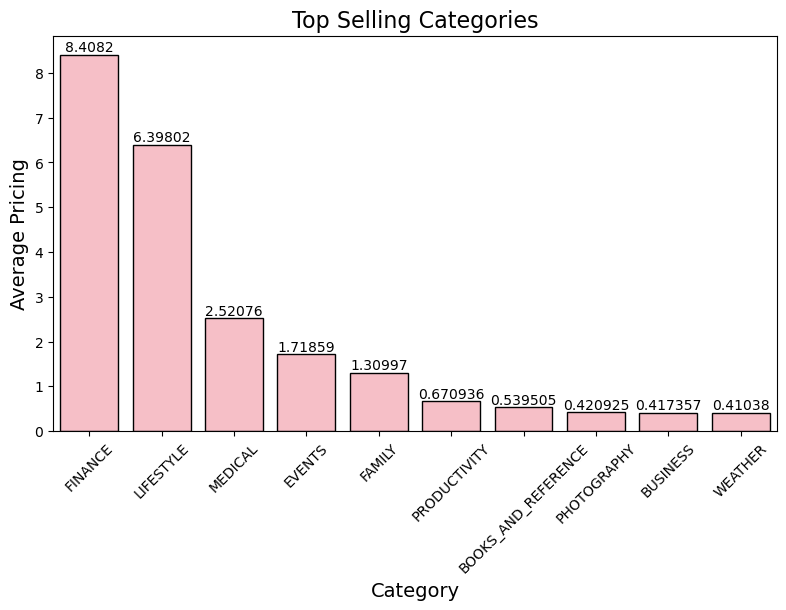

In [48]:
top_selling = apps_df.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
vx = sns.barplot(x=top_selling.index, y=top_selling.values, color='lightpink', edgecolor='black')
for container in vx.containers:
    vx.bar_label(container)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Pricing',fontsize=14)
plt.title('Top Selling Categories', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Top Content Rating by Apps :

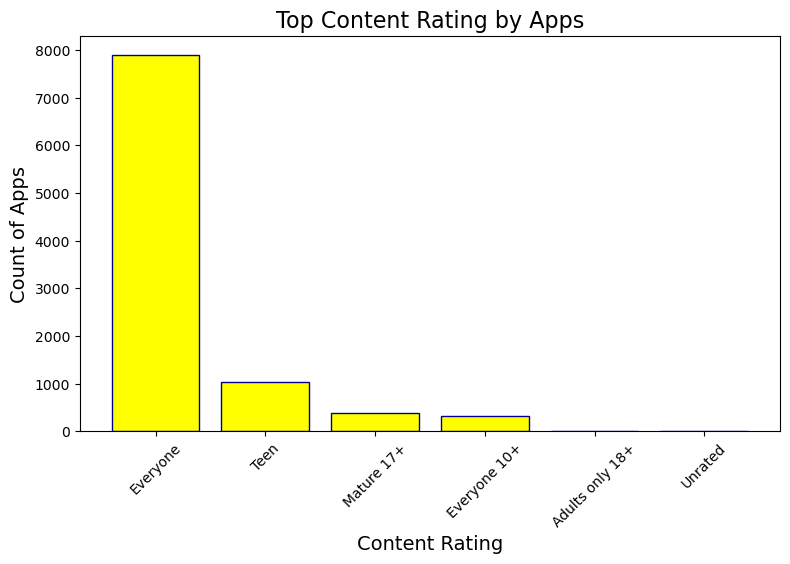

In [52]:
top_cat = apps_df.groupby('Content Rating')['App'].count().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(top_cat.index, top_cat.values, color='yellow', edgecolor='darkblue')
plt.title('Top Content Rating by Apps', fontsize=16)
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Count of Apps', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## Metrics Analysis :

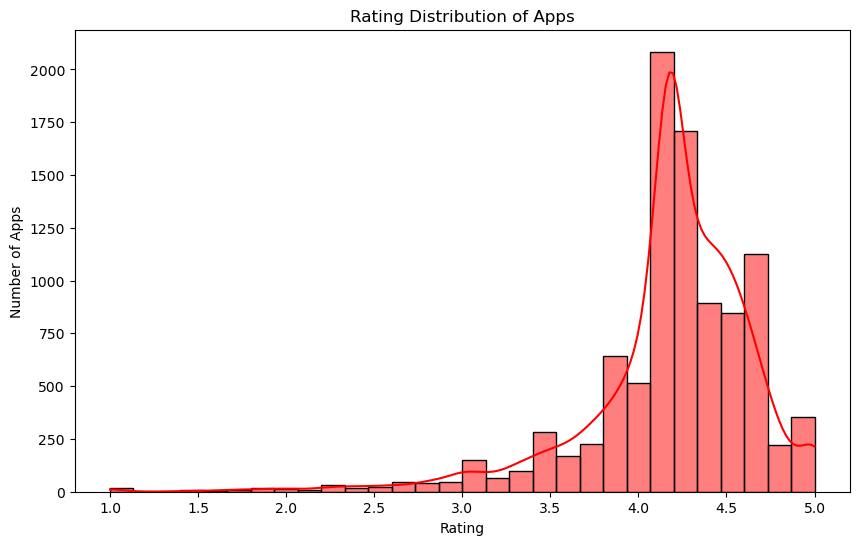

In [18]:
# Distribution of Ratings

plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], bins=30, kde=True, color='red')
plt.title('Rating Distribution of Apps')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

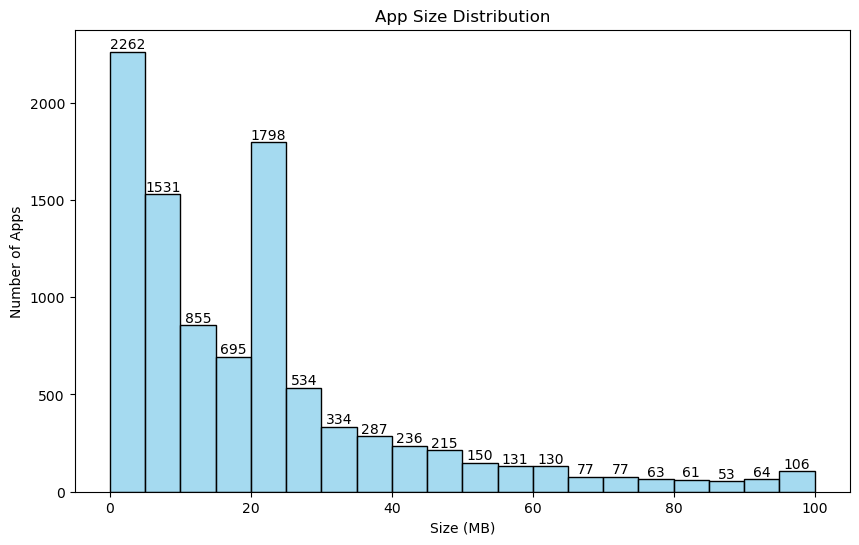

In [19]:
# Distribution of App Sizes

plt.figure(figsize=(10, 6))
ax = sns.histplot(apps_df['Size'], bins=20, color='skyblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('App Size Distribution')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()

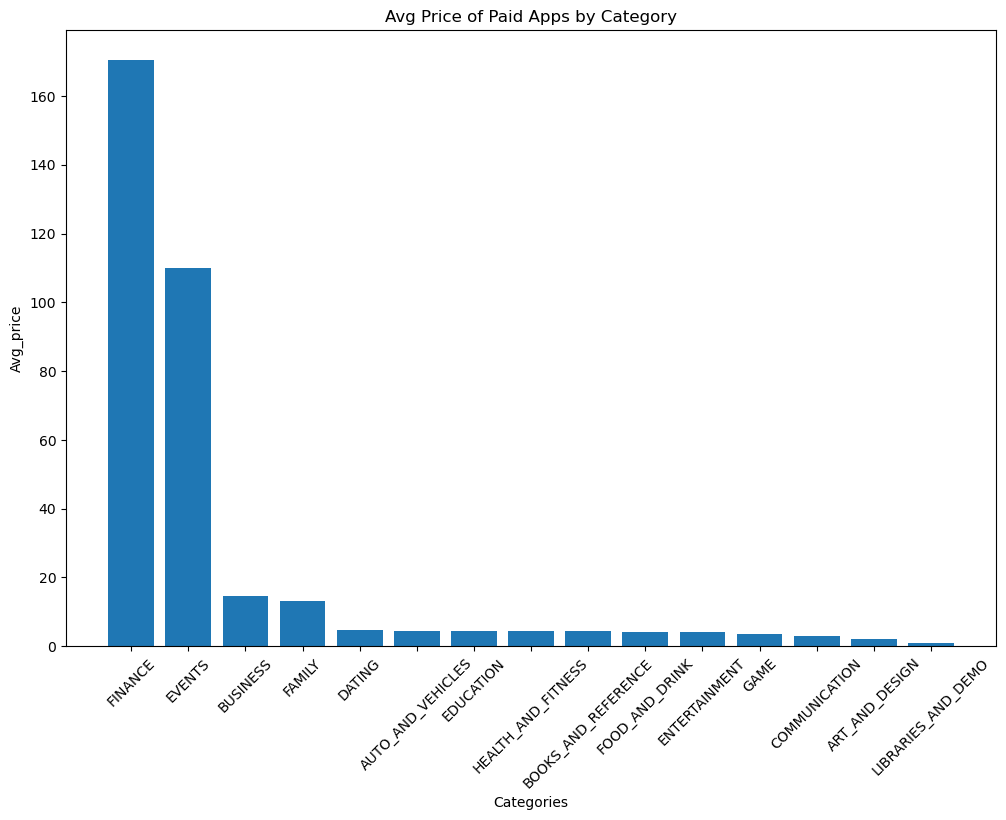

In [53]:
## Average Amt Spent on Paid Apps :

paid_apps = apps_df[apps_df['Type']=='Paid']
paid_avg = paid_apps.groupby('Category')['Price'].mean().head(15).sort_values(ascending=False)

plt.figure(figsize=(12,8))
plt.bar(paid_avg.index, paid_avg.values)
plt.title('Avg Price of Paid Apps by Category')
plt.xlabel('Categories')
plt.ylabel('Avg_price')
plt.xticks(rotation=45)
plt.show()

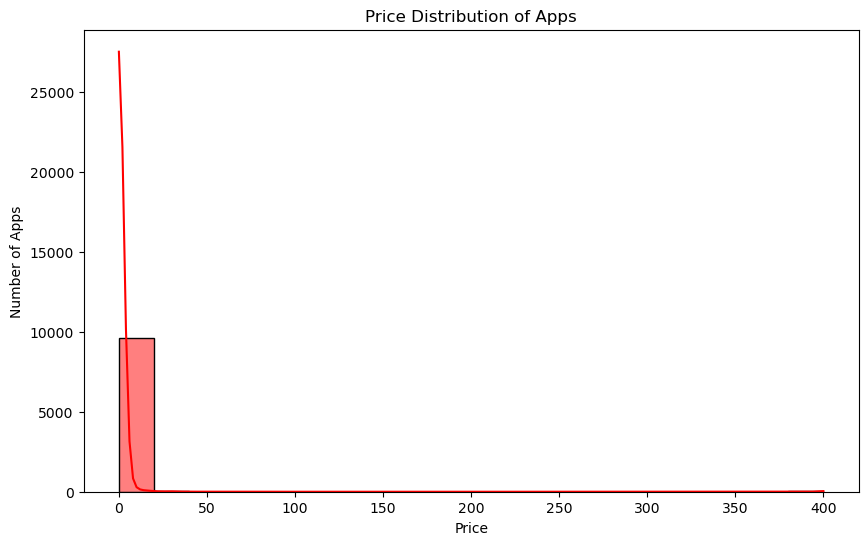

In [21]:
# Plot pricing distribution

plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Price'], bins=20, kde=True, color='red')
plt.title('Price Distribution of Apps')
plt.xlabel('Price')
plt.ylabel('Number of Apps')
plt.show()

#### Check Relation Between Installs and Ratings :

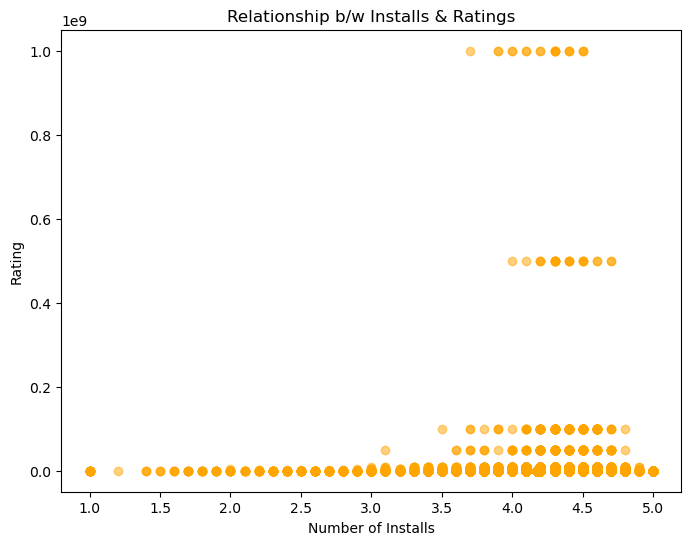

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(apps_df['Rating'], apps_df['Installs'], alpha=0.5, color='orange')
plt.title('Relationship b/w Installs & Ratings')
plt.xlabel('Number of Installs')
plt.ylabel('Rating')
plt.show()

### Comparison Between Free and Paid Apps on the basis of Installs :

In [61]:
install_type = apps_df.groupby('Type')['Installs'].sum()
print(install_type)

Type
Free    75065572646
Paid       57364881
Name: Installs, dtype: int64


## Sentiment Analysis :

In [25]:
## Read the Another Dataset :

user_reviews_df = pd.read_csv('user_reviews.csv')
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [26]:
## Check Null Values :
user_reviews_df.isnull().sum()

## Dropping rows with null values :
user_reviews_df.dropna(inplace=True)

In [27]:
## Checking DataTypes :
user_reviews_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [28]:
user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


#### Sentiment Distribution of User Reviews :

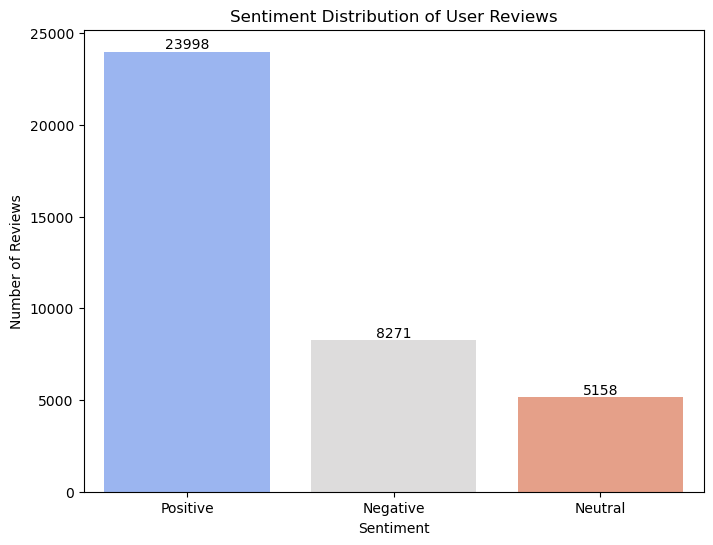

In [29]:
sentiment_counts = user_reviews_df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show() 

#### Sentiment Polarity by Sentiments :

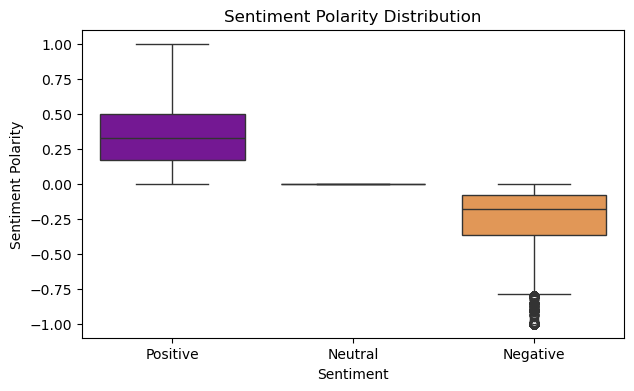

In [30]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Sentiment', y='Sentiment_Polarity', data=user_reviews_df, palette='plasma')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Polarity')
plt.show()

In [31]:
### Combining both the Datasets :

df = pd.merge(apps_df,user_reviews_df, on='App')
df.head()

,Id,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


#### Calculate Avg_Sentiment_Polarity by each Category :

In [32]:
category_sentiment = df.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
category_sentiment

Category
COMICS                 0.449810
EVENTS                 0.377933
AUTO_AND_VEHICLES      0.348683
PARENTING              0.318880
WEATHER                0.294978
HEALTH_AND_FITNESS     0.290823
EDUCATION              0.279332
PERSONALIZATION        0.278490
MAPS_AND_NAVIGATION    0.267218
FOOD_AND_DRINK         0.266882
BOOKS_AND_REFERENCE    0.248422
LIBRARIES_AND_DEMO     0.240771
HOUSE_AND_HOME         0.235704
ART_AND_DESIGN         0.234735
BUSINESS               0.232189
MEDICAL                0.224071
PHOTOGRAPHY            0.223078
LIFESTYLE              0.215944
TOOLS                  0.214037
SHOPPING               0.196654
TRAVEL_AND_LOCAL       0.194810
BEAUTY                 0.193360
SPORTS                 0.192511
PRODUCTIVITY           0.184225
DATING                 0.178846
COMMUNICATION          0.177275
FINANCE                0.170783
VIDEO_PLAYERS          0.143543
ENTERTAINMENT          0.131206
NEWS_AND_MAGAZINES     0.127736
FAMILY                 0.120950

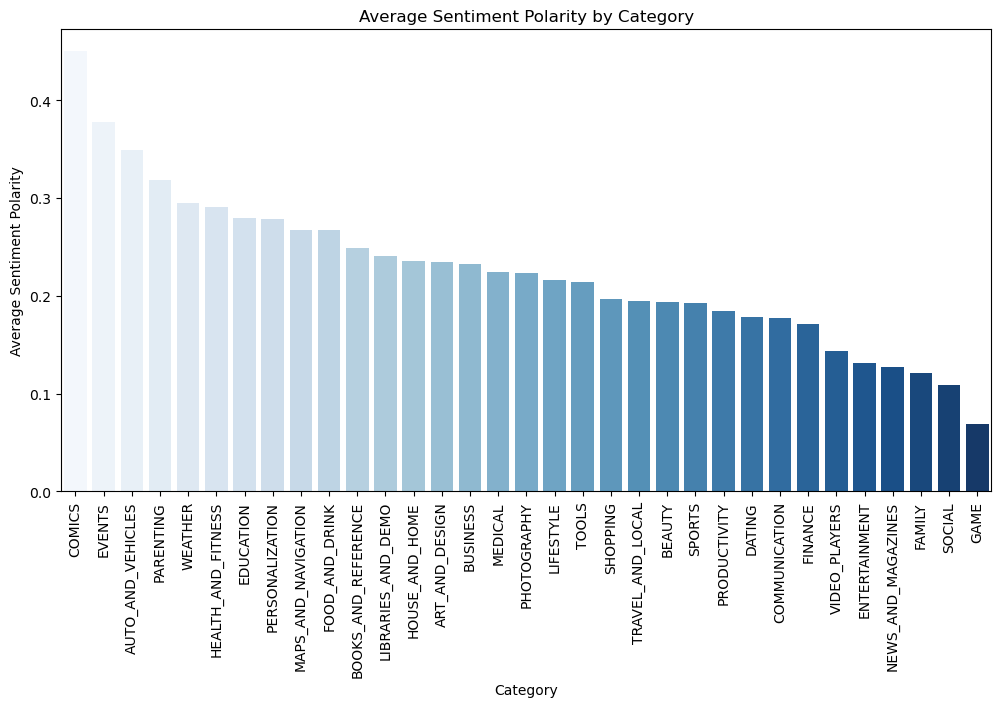

In [33]:
## Visualisation : 

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values, palette='Blues')
plt.xticks(rotation=90)
plt.title('Average Sentiment Polarity by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Polarity')
plt.show()

## Insights and Recommendations :

<b>Insights:</b></br>
•	Most apps have high ratings (4.0–4.5) and some are underperforming below 3.0.</br>
•	App sizes are generally or mostly under 60 MB.</br>
•	Installs are concentrated among a few popular apps.</br>.
•	Free apps dominate the market, with paid apps being rare and concentrated in lower price ranges.</br>
•	User sentiments are mostly positive, but addressing negative reviews can improve satisfaction.</br>
•	Categories with high ratings and reviews indicate strong user engagement.</br>

<b>Recommendations:</b></br>
•	Improve poorly rated apps by addressing user feedback.</br>
•	Optimize app sizes to appeal to storage-conscious users.</br>
•	Boost visibility and installs for lesser-known apps through marketing.</br>
•	Focus on monetization strategies for free apps while maintaining user experience.</br>
•	Address common issues highlighted in negative reviews.</br>
•	Prioritize investments in popular and highly engaged categories.</br>